# Equations

$ V(s_t) = \gamma ^0r(s_t) + \gamma ^1r(s_{t+1}) + \gamma ^2r(s_{t+2}) + ... + \gamma ^nr(s_{t+n})$

$ \delta (s_t) = [r(s_t) + \gamma V(s_{t+1})] - V(s_t) $

$ V(s_t) = V(s_t) + \alpha\delta $

$ \pi (s_t) = argmax_a V(s_t) $

## Temporal Difference 

In [40]:
from plotly.graph_objs import Scatter, Layout
import matplotlib.pyplot as plt
import plotly
import numpy as np
import random

In [41]:
# state 2 is where the cheese is
# 1X3 maze

def reward(s):
    if s == 0:
        return 1
    else:
        return 0
    
def policy(s,V):
    x = random.random()
    ep = 0.1
    left = ((s-1)+len(V))%len(V)
    right = ((s+1)+len(V))%len(V)
    
    if x < ep:
            #print('Random choice')
        return random.choice([left,right])
    if V[right] == V[left]:
        return random.choice([left,right])
    elif V[right] > V[left]:
        return right
    else:
        return left
        
def TD(v_size, num_ep, alpha, gamma):    
    num_episodes = num_ep
    V = [0]*v_size
    V[9] = -10 # sudo barrier
    print('Initial V is',V)
    plt.plot([x for x in range(v_size)], V, 'bo',[x for x in range(v_size)], V, 'k')
    plt.axis([0, v_size, 0, 1])
    plt.show()
    for x in range(num_episodes):
        #print('Episode:',x)
        s = 10
        t_state = 0
        while s != t_state:
            new_state = policy(s,V) #get new state
            r = reward(s) #get reward at state s
            error = (r + gamma*V[new_state]) - V[s] #calc error
            V[s] += alpha*error #update V
            s = new_state #update state s
           
        #reward absorbed
        r = reward(s)
        error = r - V[s]
        V[s] += error
        ##############
        #print(V)
    print('Final V is',V)
    plt.plot([x for x in range(v_size)], V, 'bo',[x for x in range(v_size)], V, 'k')
    plt.axis([0, v_size, 0, 1])
    plt.show()

Initial V is [0, 0, 0, 0, 0, 0, 0, 0, 0, -10, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


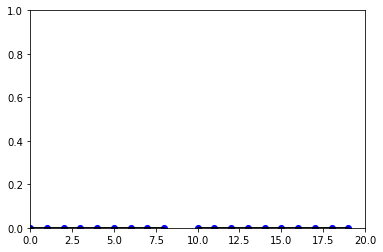

Final V is [1, 0.82421859375, 0.5655160546875, 0.3513119343750001, 0.151421216484375, 0.018452812500000006, 0.0, 0.03927441787623504, 0.15945388868487276, 0.23458802454897754, 0.2863304107435498, 0.34841638325872637, 0.38793374652676194, 0.40842194126568104, 0.45950018573653645, 0.556410854290607, 0.6427797318336277, 0.7262943868648439, 0.8096419198779581, 0.8999999999999995]


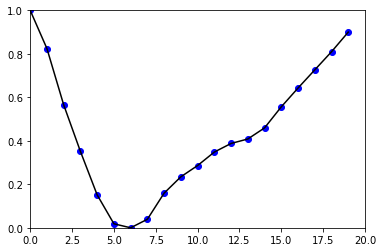

In [42]:
TD(20,4000,.5,.9)

In [ ]:
add negative punishment for 2d maze
add eligibility traces
V += alpha Delta(x)eVect